使用AdaBoost解决分类问题

数据集：白酒数据，共有13个特征

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

In [2]:
cwd = '/home/xijian/pycharm_projects/Magic-NLPer/MachineLearning/'
data_dir = cwd+'RandomForest随机森林/data/'

# Wine dataset and rank the 13 features by their respective importance measures
df_wine = pd.read_csv(data_dir+'wine.data',
                      header=None,
                      names=['Class label', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium',
                               'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity',
                               'Hue', 'OD280/OD315 of diluted wines', 'Proline'])
print('Class labels', np.unique(df_wine['Class label'])) # 一共有3个类

df_wine = df_wine[df_wine['Class label']!=1] # 去掉一个类

y = df_wine['Class label'].values
X = df_wine[['Alcohol', 'OD280/OD315 of diluted wines']].values

Class labels [1 2 3]


In [3]:
le = LabelEncoder()
y = le.fit_transform(y)

print('Class labels', np.unique(y))
print('numbers of features:', X.shape[1])

# 划分训练集测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)
X_train.shape


Class labels [0 1]
numbers of features: 2


(95, 2)

In [4]:
# 先使用决策树做分类，作为GBDT的对比参照
tree = DecisionTreeClassifier(criterion='entropy',
                              random_state=1,
                              max_depth=1)
tree = tree.fit(X_train, y_train)
y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)
tree_train = accuracy_score(y_train, y_train_pred)
tree_test = accuracy_score(y_test, y_test_pred)
print('Decision tree train/test accuracies %.3f/%.3f' % (tree_train, tree_test))

Decision tree train/test accuracies 0.916/0.875


In [5]:
# 绘制决策边界
def plot_decision_regions(X, y, classifier_list, classifier_names):
    x_min = X[:, 0].min() - 1
    x_max = X[:, 0].max() + 1
    y_min = X[:, 1].min() - 1
    y_max = X[:, 1].max() + 1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
    np.arange(y_min, y_max, 0.1))

    f, axarr = plt.subplots(1, 2, sharex='col', sharey='row', figsize=(8, 3))

    for idx, clf, tt in zip([0, 1],classifier_list,classifier_names):
        clf.fit(X, y)
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        axarr[idx].contourf(xx, yy, Z, alpha=0.3)
        axarr[idx].scatter(X[y==0, 0], X[y==0, 1], c='blue', marker='^')
        axarr[idx].scatter(X[y==1, 0], X[y==1, 1], c='red', marker='o')
        axarr[idx].set_title(tt)
        axarr[0].set_ylabel('Alcohol', fontsize=12)

    plt.text(10.2, -0.5, s='OD280/OD315 of diluted wines', ha='center', va='center', fontsize=12)
    plt.show()

In [6]:
ada = AdaBoostClassifier(base_estimator=tree,
                         n_estimators=500,
                         learning_rate=0.1,
                         random_state=1)
ada = ada.fit(X_train, y_train)
y_train_pred = ada.predict(X_train)
y_test_pred = ada.predict(X_test)
ada_train = accuracy_score(y_train, y_train_pred)
ada_test = accuracy_score(y_test, y_test_pred)
print('AdaBoost train/test accuracies %.3f/%.3f' % (ada_train, ada_test))

AdaBoost train/test accuracies 1.000/0.917


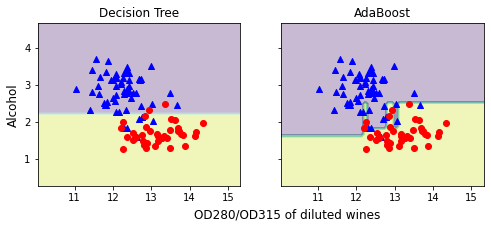

In [7]:
plot_decision_regions(X_train, y_train, [tree, ada], ['Decision Tree', 'AdaBoost'])

其实使用AdaBoost+DecisionTree分类树 基本就实现了GBDT分类问题